Coinbase: {'data': {'amount': '93795.275', 'base': 'BTC', 'currency': 'USD'}}
Kraken: {'error': [], 'result': {'XXBTZUSD': {'a': ['93800.00000', '3', '3.000'], 'b': ['93799.90000', '18', '18.000'], 'c': ['93800.00000', '0.01300000'], 'v': ['195.60643767', '2447.66200707'], 'p': ['93077.85936', '92753.19922'], 't': [5593, 43683], 'l': ['92457.90000', '91168.50000'], 'h': ['93800.00000', '94695.00000'], 'o': '92523.50000'}}}
[2025-01-10 04:11:42] Buy on Coinbase at 93795.27 and sell on Kraken at 93800.00
Profit: 4.73 USD, New Balance: 1004.73 USD
Coinbase: {'data': {'amount': '93815.35', 'base': 'BTC', 'currency': 'USD'}}
Kraken: {'error': [], 'result': {'XXBTZUSD': {'a': ['93809.50000', '1', '1.000'], 'b': ['93809.40000', '22', '22.000'], 'c': ['93809.40000', '0.00039127'], 'v': ['197.60925387', '2449.66440043'], 'p': ['93085.17851', '92754.05489'], 't': [5621, 43709], 'l': ['92457.90000', '91168.50000'], 'h': ['93809.50000', '94695.00000'], 'o': '92523.50000'}}}
[2025-01-10 04:11:52] B

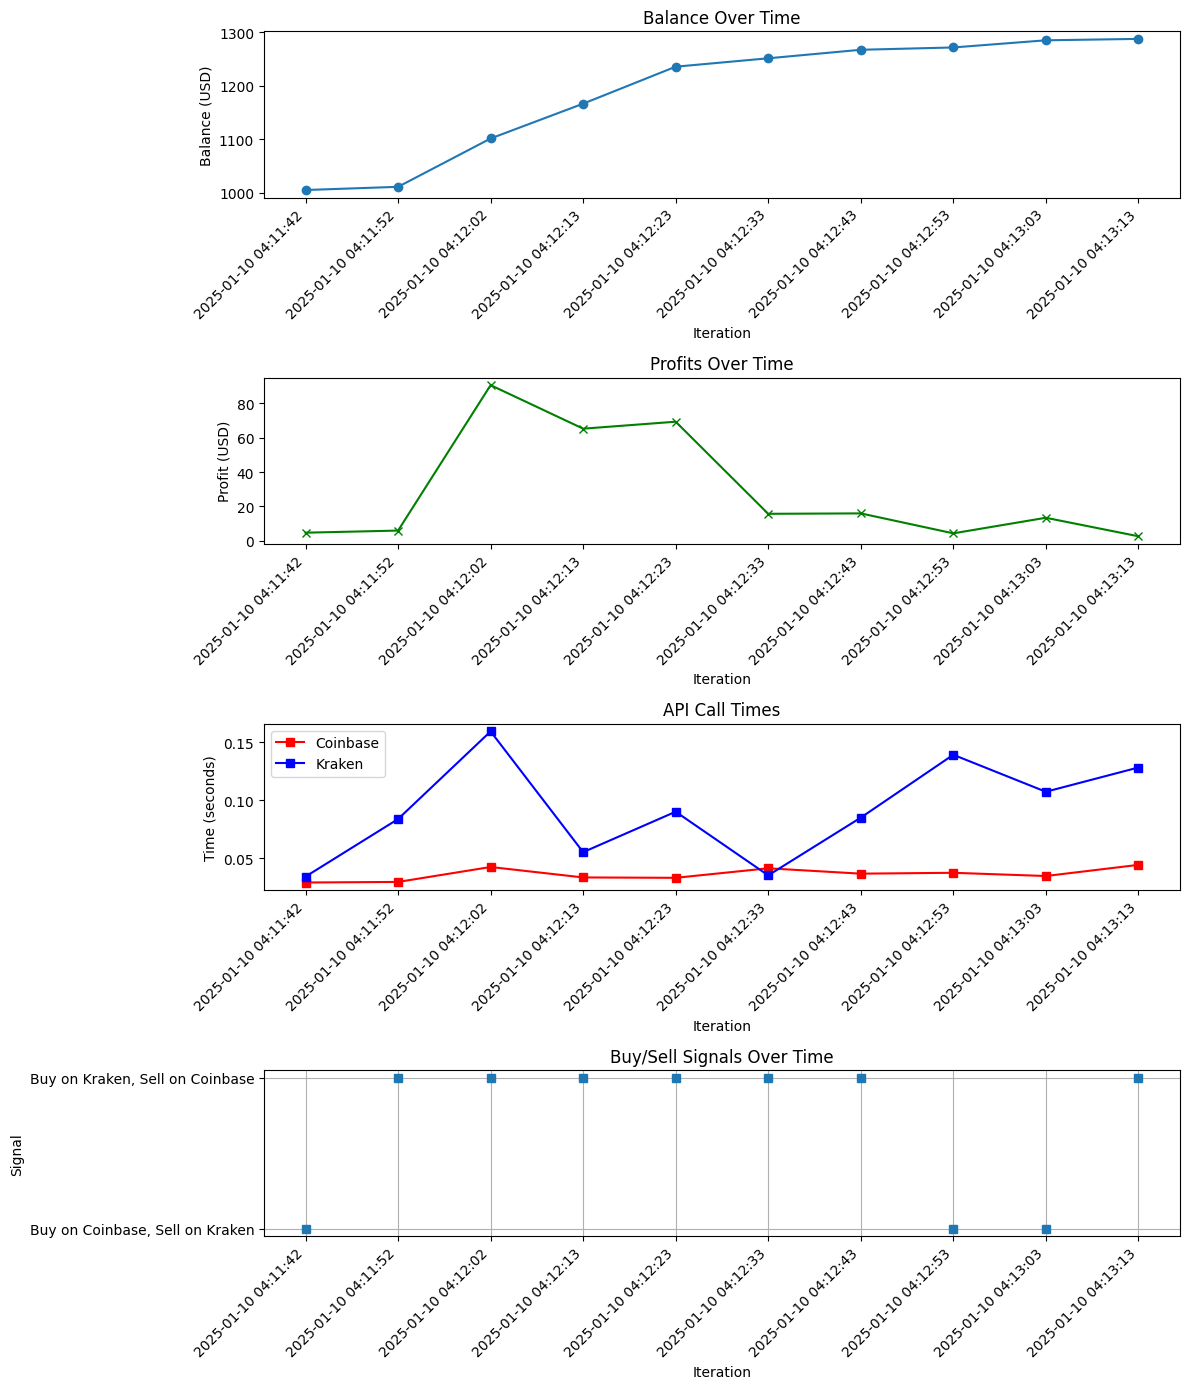

In [14]:
import os
import requests
import time
import matplotlib.pyplot as plt
from datetime import datetime

# Function to get the current price from Coinbase
def get_coinbase_price(symbol, api_key):
    url = f"https://api.coinbase.com/v2/prices/{symbol}/spot"
    headers = {
        'Authorization': f'Bearer {api_key}'
    }
    start_time = time.time()
    response = requests.get(url, headers=headers)
    end_time = time.time()
    data = response.json()
    print("Coinbase:", data)
    price = float(data['data']['amount'])
    elapsed_time = end_time - start_time
    return price, elapsed_time

# Function to get the current price from Kraken
def get_kraken_price(pair):
    url = f"https://api.kraken.com/0/public/Ticker?pair={pair}"
    start_time = time.time()
    response = requests.get(url)
    end_time = time.time()
    data = response.json()
    print("Kraken:", data)
    result = list(data['result'].values())[0]
    price = float(result['c'][0])  # 'c' contains the last trade closed price
    elapsed_time = end_time - start_time
    return price, elapsed_time

# Function to simulate arbitrage opportunities and track metrics
def simulate_arbitrage(symbol, kraken_pair, initial_balance, iterations, interval, coinbase_api_key):
    balance = initial_balance
    balances = []
    profits = []
    buy_sell_signals = []
    timestamps = []
    coinbase_times = []
    kraken_times = []

    for _ in range(iterations):
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        coinbase_price, coinbase_time = get_coinbase_price(symbol, coinbase_api_key)
        kraken_price, kraken_time = get_kraken_price(kraken_pair)

        if kraken_price > coinbase_price:
            # Buy on Coinbase and sell on Kraken
            profit = kraken_price - coinbase_price
            balance += profit
            print(f"[{timestamp}] Buy on Coinbase at {coinbase_price:.2f} and sell on Kraken at {kraken_price:.2f}")
            print(f"Profit: {profit:.2f} USD, New Balance: {balance:.2f} USD")
            buy_sell_signals.append("Buy on Coinbase, Sell on Kraken")
        elif kraken_price < coinbase_price:
            # Buy on Kraken and sell on Coinbase
            profit = coinbase_price - kraken_price
            balance += profit
            print(f"[{timestamp}] Buy on Kraken at {kraken_price:.2f} and sell on Coinbase at {coinbase_price:.2f}")
            print(f"Profit: {profit:.2f} USD, New Balance: {balance:.2f} USD")
            buy_sell_signals.append("Buy on Kraken, Sell on Coinbase")
        else:
            profit = 0
            print(f"[{timestamp}] No arbitrage opportunity")
            buy_sell_signals.append("No opportunity")

        balances.append(balance)
        profits.append(profit)
        timestamps.append(timestamp)
        coinbase_times.append(coinbase_time)
        kraken_times.append(kraken_time)
        time.sleep(interval)  # Wait for the specified interval before the next iteration

    print(f"Final Balance after {iterations} iterations: {balance:.2f} USD")
    return balances, profits, buy_sell_signals, timestamps, coinbase_times, kraken_times

# Function to plot the metrics
def plot_metrics(balances, profits, buy_sell_signals, timestamps, coinbase_times, kraken_times):
    iterations = range(len(balances))

    plt.figure(figsize=(12, 14))

    plt.subplot(4, 1, 1)
    plt.plot(iterations, balances, marker='o')
    plt.title('Balance Over Time')
    plt.xlabel('Iteration')
    plt.ylabel('Balance (USD)')
    plt.xticks(iterations, timestamps, rotation=45, ha='right')

    plt.subplot(4, 1, 2)
    plt.plot(iterations, profits, marker='x', color='g')
    plt.title('Profits Over Time')
    plt.xlabel('Iteration')
    plt.ylabel('Profit (USD)')
    plt.xticks(iterations, timestamps, rotation=45, ha='right')

    plt.subplot(4, 1, 3)
    plt.plot(iterations, coinbase_times, marker='s', color='r')
    plt.plot(iterations, kraken_times, marker='s', color='b')
    plt.title('API Call Times')
    plt.xlabel('Iteration')
    plt.ylabel('Time (seconds)')
    plt.xticks(iterations, timestamps, rotation=45, ha='right')
    plt.legend(['Coinbase', 'Kraken'])

    plt.subplot(4, 1, 4)
    plt.plot(iterations, buy_sell_signals, marker='s', linestyle='None')
    plt.title('Buy/Sell Signals Over Time')
    plt.xlabel('Iteration')
    plt.ylabel('Signal')
    plt.xticks(iterations, timestamps, rotation=45, ha='right')

    plt.tight_layout()
    plt.grid(True)
    plt.show()

# Example usage
if __name__ == "__main__":
    symbol = "BTC-USD"  # Bitcoin to USD on Coinbase
    kraken_pair = "XXBTZUSD"  # Bitcoin to USD on Kraken
    initial_balance = 1000  # Starting balance in USD
    iterations = 10  # Number of iterations for the simulation
    interval = 10  # Time interval between iterations in seconds

    # Set your API key for Coinbase
    coinbase_api_key = os.getenv('COINBASE_API_KEY', 'your_coinbase_api_key')

    balances, profits, buy_sell_signals, timestamps, coinbase_times, kraken_times = simulate_arbitrage(symbol, kraken_pair, initial_balance, iterations, interval, coinbase_api_key)
    plot_metrics(balances, profits, buy_sell_signals, timestamps, coinbase_times, kraken_times)